# Image Visualization Toolkit

This notebook provides a set of tools to help visualize and explore images for various analysis tasks. The primary functions allow you to:

- **Load and Display Images**: Easily load images from different formats and display them in various layouts (e.g., single images, side-by-side comparisons, or grid views).

## Libraries and framework

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology, io
from skimage.color import rgb2gray

In [2]:
# Function to compare the results
def show_images(images, labels,  figsize=(18, 6), fontsize = 18,slice_num = 0):  
    for i in range(len(images)):
        if(len(images[i].shape)==3):
            images[i] = images[i][slice_num,:,:]

    # Visual comparison
    plt.figure(figsize=figsize)
    
    total_plots = len(images)
    for i in range(len(images)):
        plt.subplot(1, total_plots, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(labels[i], fontsize = fontsize)
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    
    return 

In [8]:
def show_cropped_images(images, labels, crop_size, crop_position, figsize=(18, 6), fontsize=18, slice_num=0):
    """
    Display cropped images with given labels.
    
    Parameters:
    images (list of np.array): List of images to be displayed.
    labels (list of str): List of labels corresponding to the images.
    crop_size (tuple): (width, height) of the crop.
    crop_position (tuple): (x, y) position of the upper-left corner of the crop.
    figsize (tuple): Figure size for plotting.
    fontsize (int): Font size for the titles.
    slice_num (int): Slice index for 3D images.
    """
    crop_width, crop_height = crop_size
    crop_x, crop_y = crop_position
    
    cropped_images = []
    
    for img in images:
        if img.ndim == 3:
            img = img[slice_num, :, :]
        
        img_height, img_width = img.shape
        
        # Check if crop is within valid bounds
        if (crop_x + crop_width > img_width) or (crop_y + crop_height > img_height):
            raise ValueError(f"Crop size {crop_size} at position {crop_position} exceeds image dimensions ({img_width}, {img_height})")
        
        # Perform cropping
        cropped_img = img[crop_y:crop_y + crop_height, crop_x:crop_x + crop_width]
        cropped_images.append(cropped_img)
    
    # Display images
    plt.figure(figsize=figsize)
    total_plots = len(cropped_images)
    
    for i, img in enumerate(cropped_images):
        plt.subplot(1, total_plots, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(labels[i], fontsize=fontsize)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return

In [3]:
def load_image(path, xsize, ysize, zsize, dtype, dtype_out):
    img = np.fromfile(path, dtype=dtype)
    img = img.reshape((zsize, ysize, xsize))
    img = img.astype(dtype = dtype_out)
    return img

## Benchmark Images

### Grayscale

In [5]:
def showIndexes(a_list):
  for i in range(len(a_list)):
    print(str(i) + " " + a_list[i])
    
path = "../../example_images/grayscale" 
datasets = [f for f in os.listdir(path) if f.endswith('.raw')]
showIndexes(datasets)

0 Recon_2052x2052x2048_32bits.raw
1 crua_A_190x207x100_16b.raw
2 ILSIMG_600x1520x1520_16bits.raw
3 Recon_2048x2052x2052_32bits.raw
4 tomoFiltered_masked_2048x2048x1964_16bit.raw


In [14]:
images_data = [{"path": "../../example_images/grayscale/crua_A_190x207x100_16b.raw",
                "xsize":190,
                "ysize":207,
                "zsize":100,
                "dtype":"uint16"},
               {"path": "../../example_images/grayscale/ILSIMG_600x1520x1520_16bits.raw",
                "xsize":600,
                "ysize":1520,
                "zsize":1520,
                "dtype":"uint16"},
               {"path": "../../example_images/grayscale/Recon_2052x2052x2048_32bits.raw",
                "xsize":2052,
                "ysize":2052,
                "zsize":2048,
                "dtype":"float32"},
               {"path": "../../example_images/grayscale/tomoFiltered_masked_2048x2048x1964_16bit.raw",
                "xsize":2048,
                "ysize":2048,
                "zsize":1964,
                "dtype":"uint16"},
              ]
images = []
for i in range(len(images_data)):
    index = i
    path = images_data[index]["path"]
    xsize = images_data[index]["xsize"]
    ysize = images_data[index]["ysize"]
    zsize = images_data[index]["zsize"]
    data_type = images_data[index]["dtype"]
    if(data_type == 'uint16'):
        img = load_image(path, xsize, ysize, zsize, data_type, 'uint16')
    else:
        img = load_image(path, xsize, ysize, zsize, data_type, 'float')
    images.append(img)

In [15]:
for img in images:
    print(np.isnan(img).any())

False
False
False
False


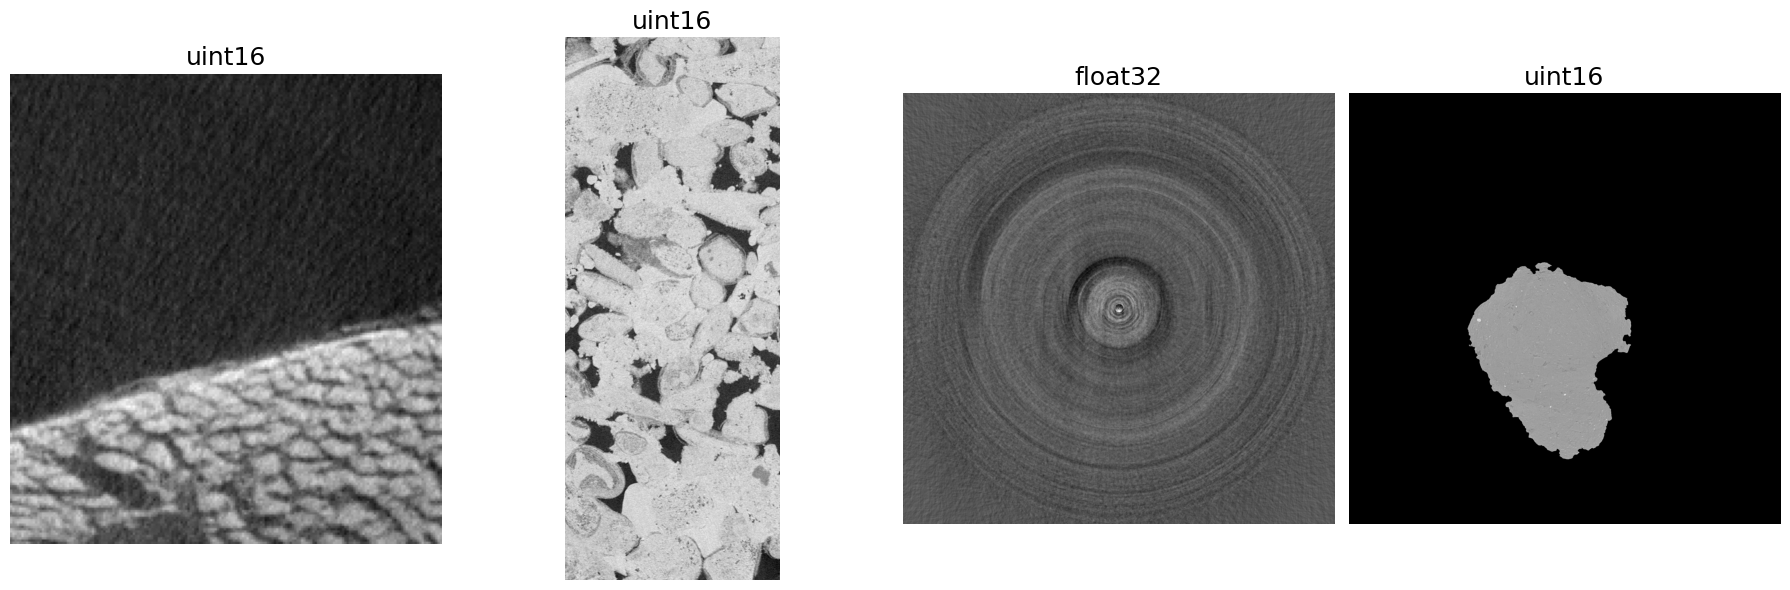

In [8]:
data_types = ['uint16', 'uint16','float32' ,'uint16']

show_images(images, data_types, slice_num = 99)

### Binary

In [9]:
path = "../../example_images/binary" 
datasets = [f for f in os.listdir(path) if f.endswith('.raw')]
showIndexes(datasets)

0 flower_194x260x1_16b.raw
1 woman_517x541x1_16b.raw
2 crua_A_190x207x100_16b.raw
3 ILSIMG_600x1520x1520_16bits.raw
4 camila_720x720x1_16b.raw
5 eagle_275x183x1_16b.raw
6 tomoFiltered_masked_2048x2048x1964_16bit.raw
7 cat_275x183x1_16b.raw
8 Recon_2052x2052x2048_16bits.raw
9 blobs_355x321x1_16b.raw


In [10]:
images_data = [{"path": "../../example_images/binary/crua_A_190x207x100_16b.raw",
                "xsize":190,
                "ysize":207,
                "zsize":100,
                "dtype":"uint16"},
               {"path": "../../example_images/binary/ILSIMG_600x1520x1520_16bits.raw",
                "xsize":600,
                "ysize":1520,
                "zsize":1520,
                "dtype":"uint16"},
               {"path": "../../example_images/binary/Recon_2052x2052x2048_16bits.raw",
                "xsize":2052,
                "ysize":2052,
                "zsize":2048,
                "dtype":"uint16"},
               {"path": "../../example_images/binary/tomoFiltered_masked_2048x2048x1964_16bit.raw",
                "xsize":2048,
                "ysize":2048,
                "zsize":1964,
                "dtype":"uint16"},
              ]
images = []
for i in range(len(images_data)):
    index = i
    path = images_data[index]["path"]
    xsize = images_data[index]["xsize"]
    ysize = images_data[index]["ysize"]
    zsize = images_data[index]["zsize"]
    data_type = images_data[index]["dtype"]
    if(data_type == 'uint16'):
        img = load_image(path, xsize, ysize, zsize, data_type, 'uint16')
    else:
        img = load_image(path, xsize, ysize, zsize, data_type, 'float')
    images.append(img)

In [11]:
for img in images:
    print(np.isnan(img).any())

False
False
False
False


In [12]:
for img in images:
    print(np.unique(img))

[0 1]
[0 1]
[0 1]
[0 1]


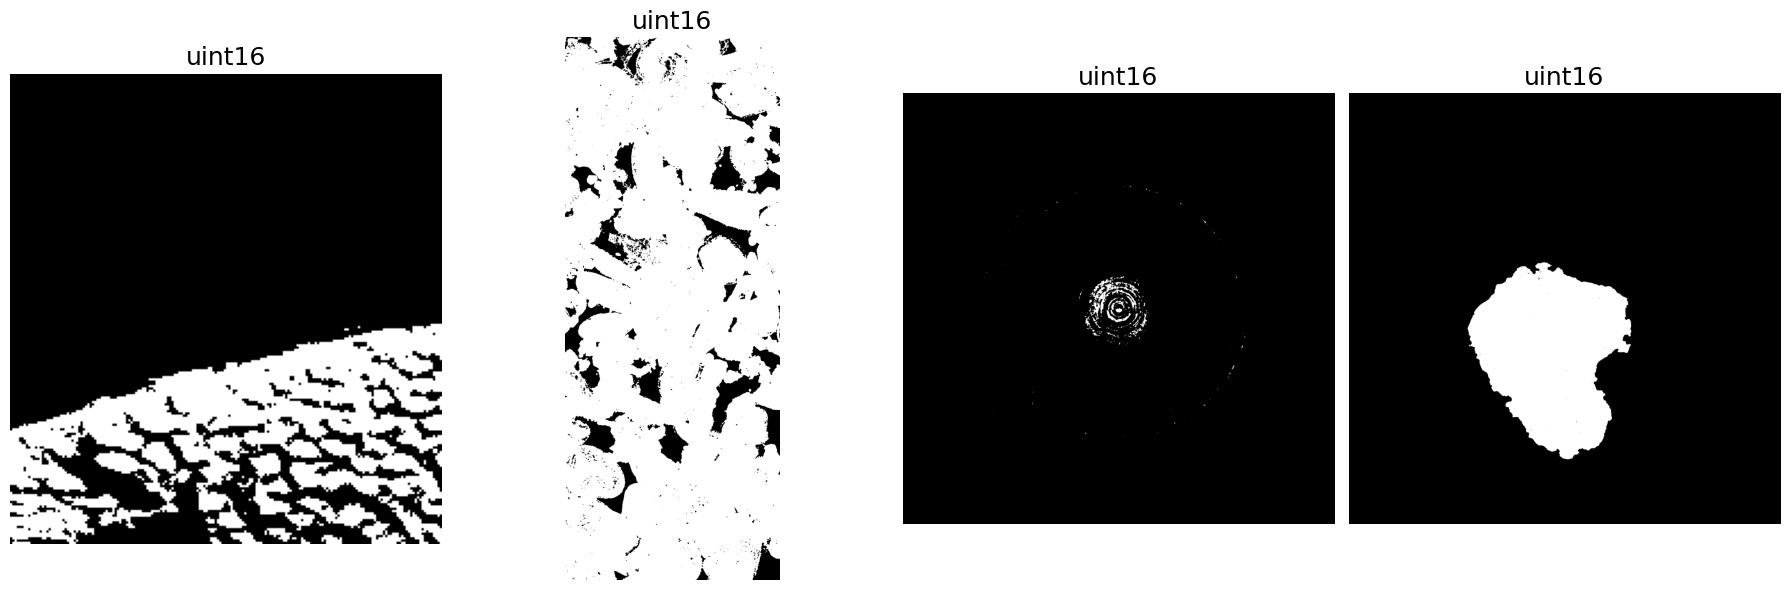

In [13]:
data_types = ['uint16', 'uint16', 'uint16' ,'uint16']

show_images(images, data_types, slice_num = 99)

## Soil study (Talita image)

In [ ]:
# original img
xsize = 2048
ysize = 2048
zsize_original = 1964
zsize = 1

paths = ["../../../../../../../../beamlines/mogno/proposals/20180217/data/Soil_Experiment/testes_segmentacao/PBV29_Talita/tomoFiltered_masked_2048x2048x1964_16bit.raw",
         "../../../../../../../../beamlines/mogno/proposals/20180217/data/Soil_Experiment/testes_segmentacao/PBV29_Talita/tomo_NLM_masked_2048x2048x1964_16bit.raw",
         "../../../../../../../../beamlines/mogno/proposals/20180217/data/Soil_Experiment/testes_segmentacao/PBV29_Talita/Matriz_poros/total/poros_matriz_2048x2048x1964_8bit.raw"
        ]

In [ ]:
data_types = ['int16', 'int16', 'int8']
images = []
for i in range(len(paths)):
    img = load_image(paths[i], xsize, ysize, zsize_original, data_types[i], 'int32')
    images.append(img)


In [ ]:
show_images(images, ['soil Talita', '', ''], slice_num = 1500)

In [ ]:
#Small
xsize = 190
ysize = 207
zsize_original = 100
zsize = 100
path = "../../example_images/grayscale/crua_A_190x207x100_16b.raw"
image2_uint32 = load_image(path, xsize, ysize, zsize,'uint16', 'uint32')
image2_int32 = load_image(path, xsize, ysize, zsize,'uint16', 'int32')
image2_float32 = load_image(path, xsize, ysize, zsize,'uint16', 'float32')

show_images([image2_uint32, image2_int32, image2_float32], ['heart uin32', 'heart in32', 'heart float32'], slice_num = 10)

## Example Deep Sirius

### Imagens de treino

In [4]:
# original img
xsize = 2048
ysize = 2048
zsize_original = 2036
zsize = 1
paths = ["../../../../../../../../beamlines/mogno/proposals/20221817/proc/pbv_biochar_Experiment/6_C2/masked_6_C2_2048x2048x2036_16bit.raw",
         "../../../../../../../../beamlines/mogno/proposals/20221817/proc/pbv_biochar_Experiment/6_C2/raiz6C2_2048x2048x2036_8bit.raw",
         "../../../../../../../../beamlines/mogno/proposals/20221817/proc/pbv_biochar_Experiment/6_C2/mapapesosW2c_6_C2_2048x2048x2036_8bit.raw"
        ]

data_types = ['int16', 'int8', 'int8']
images = []
for i in range(len(paths)):
    img = load_image(paths[i], xsize, ysize, zsize_original, data_types[i], 'int32')
    images.append(img)


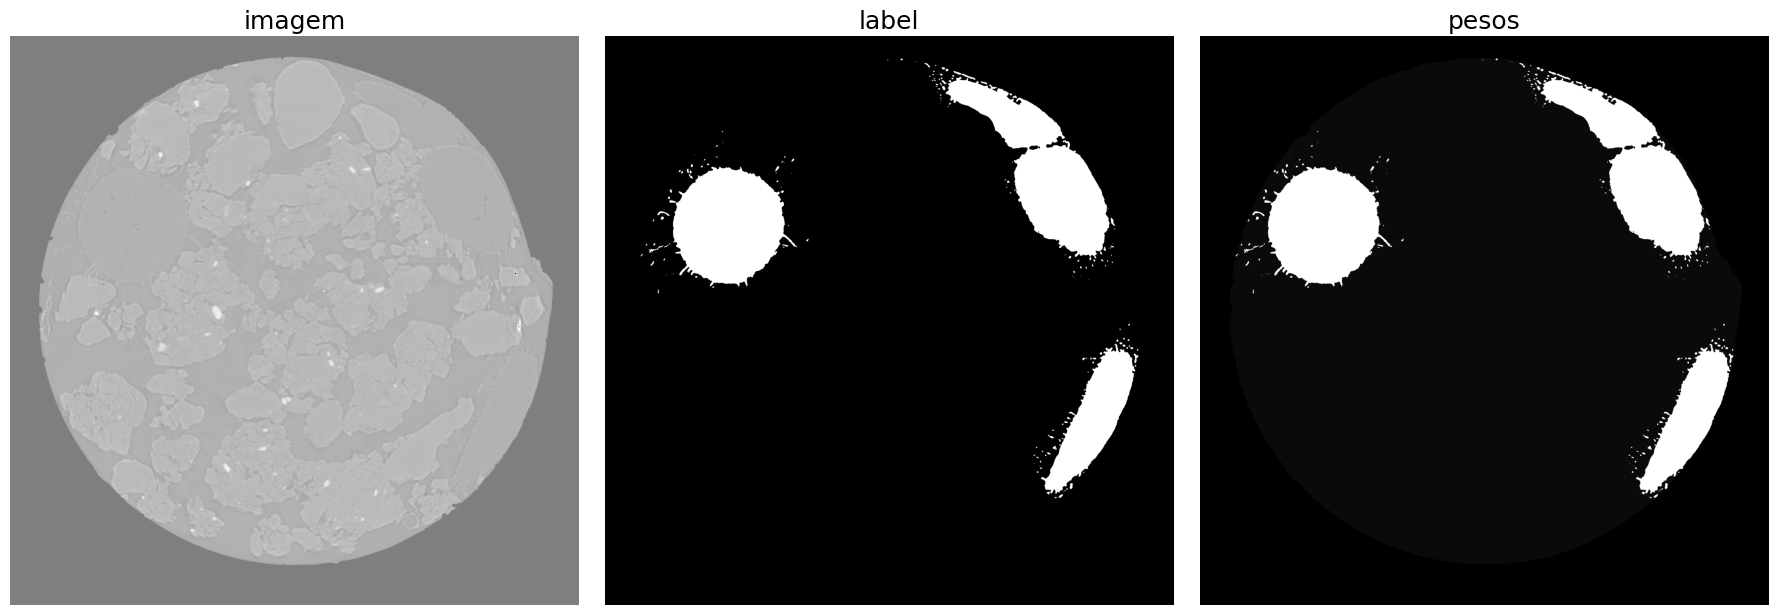

In [6]:
show_images(images, ['imagem', 'label', 'pesos'], slice_num = 1000)

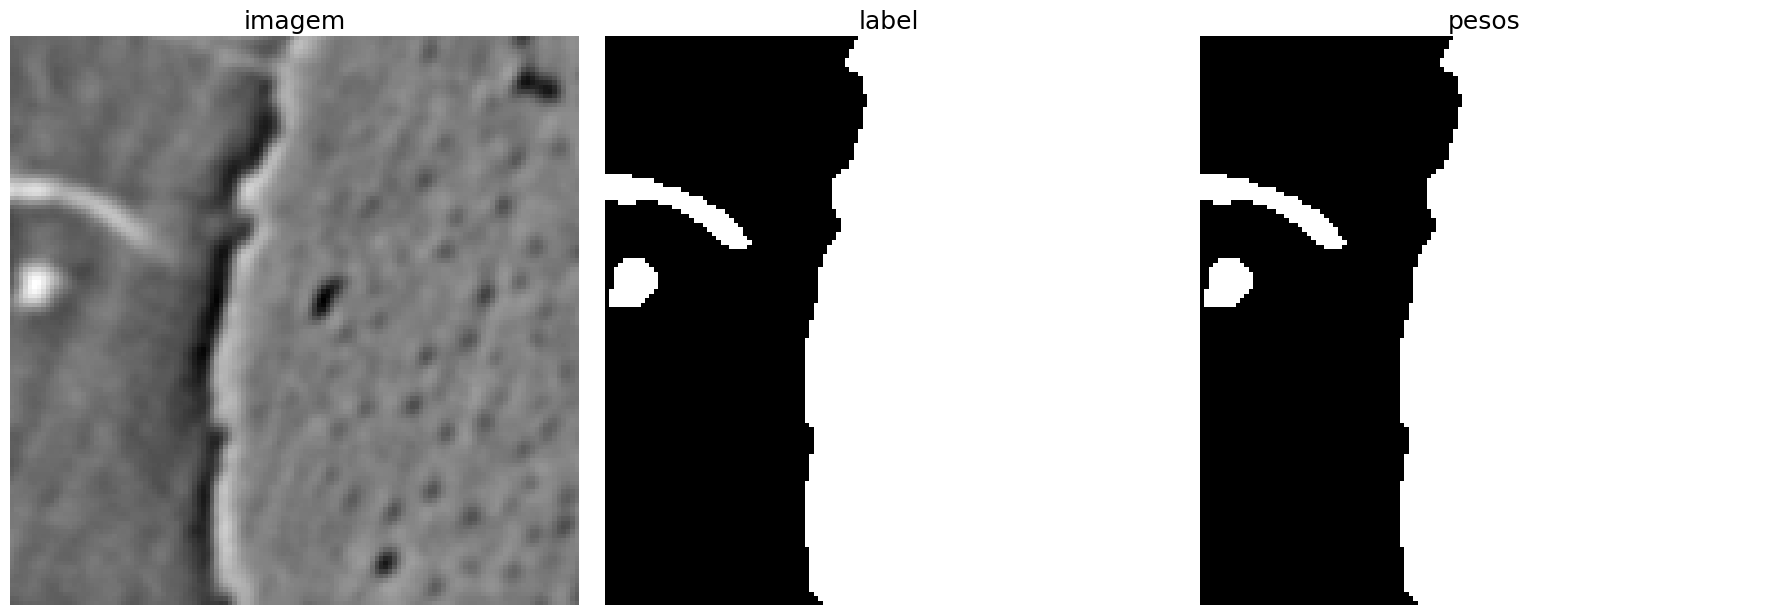

In [17]:
show_cropped_images(images, ['imagem', 'label', 'pesos'],crop_size=(128,128), crop_position=(200,600), slice_num = 1000)

### Inferência pós-treino

In [31]:
xsize = 2048
ysize = 2048
zsize_original = 2036

zsize = 1
paths = ['../../../../../../../../beamlines/mogno/proposals/20221817/proc/pbv_biochar_Experiment/5_B3/masked_5_B3_2048x2048x2036_16bit.raw',
         '../../../../../../../../labs/tepui/home/camila.araujo/masked_5_B3_2048x2048x2036_8bit.label.raw']

data_types = ['int16', 'int8']
images = []
for i in range(len(paths)):
    img = load_image(paths[i], xsize, ysize, zsize_original, data_types[i], 'int32')
    images.append(img)

In [32]:
images[1]

array([[[0, 1, 1, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 1, 1],
        [1, 1, 1, ..., 0, 1, 1],
        [1, 1, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 0, 1, 1],
        [1, 1, 1, ..., 0, 0, 1]],

       [[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 1],
        [1, 1, 1, ..., 0, 1, 1],
        [1, 1, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 

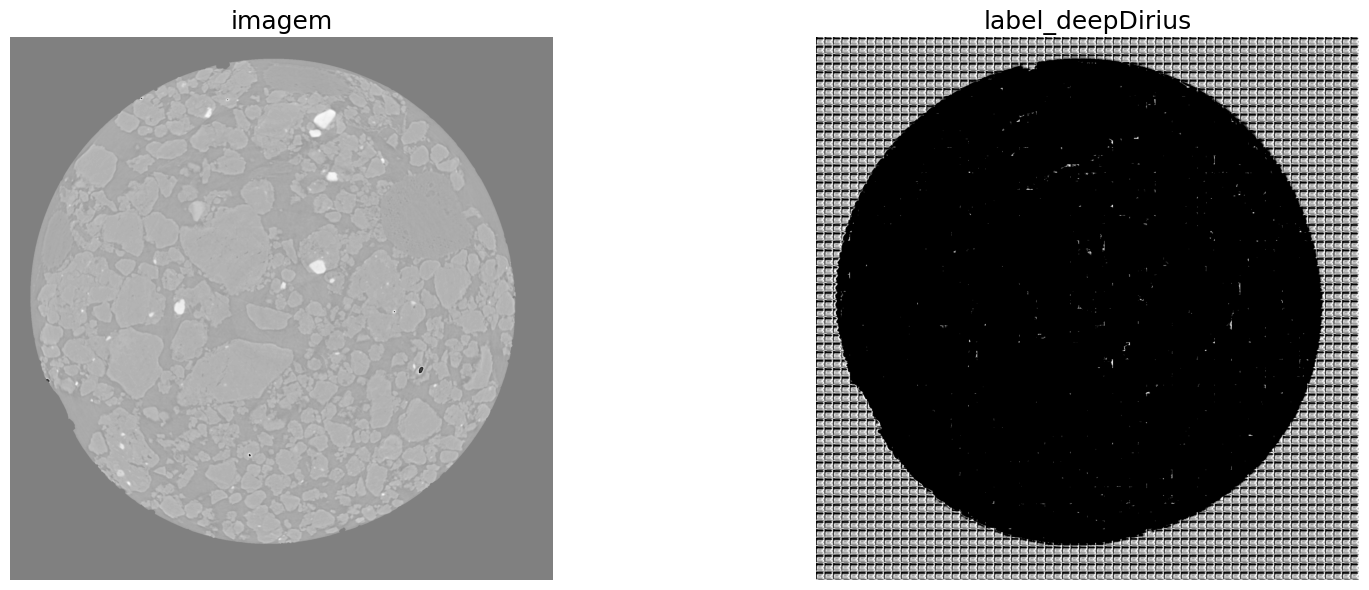

In [34]:
show_images(images, ['imagem', 'label_deepDirius'], slice_num = 1000)

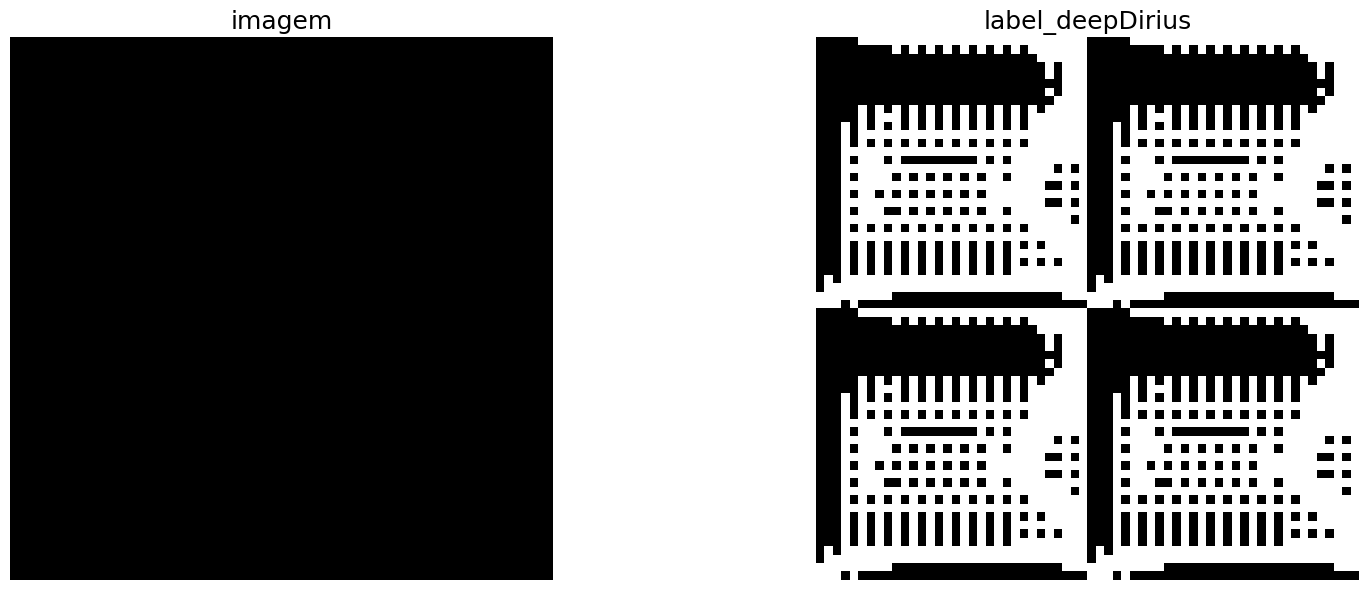

In [37]:
show_cropped_images(images, ['imagem', 'label_deepDirius'],crop_size=(64,64), crop_position=(0,0), slice_num = 1000)